In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

### LOADING

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

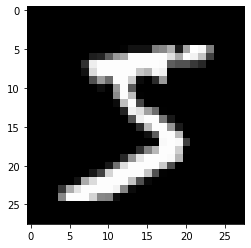

In [3]:
plt.imshow(x_train[0], cmap='gray')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# x_train = x_train/255.0
# x_test = x_test/255.0

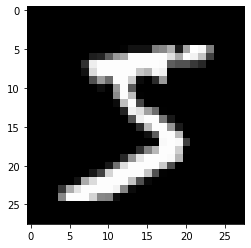

In [6]:
plt.imshow(x_train[0], cmap='gray')
# x_train

In [7]:
encoder_input = keras.Input(shape = (28,28,1), name = 'img')
x = keras.layers.Flatten()(encoder_input) #dense layer
encoder_output = keras.layers.Dense(10, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)
opt = keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 784)               8624      
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(opt, loss='mse')

In [9]:
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 5s 2ms/step - loss: 3275.5215 - val_loss: 2325.1726
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 2327.1696 - val_loss: 2294.1133
Epoch 3/3
1688/1688 [==============================] - 2s 1ms/step - loss: 2304.7254 - val_loss: 2288.7173


In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
example

array([ 708.94586,  488.81558,  235.62666,    0.     ,    0.     ,
        558.78973, 1265.4103 ,  296.71356, 1286.0242 ,  475.82336],
      dtype=float32)

In [13]:
idx = 4
ae_out = autoencoder.predict([x_test[idx].reshape(-1, 28, 28, 1)])[0]

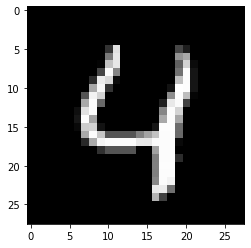

In [14]:
plt.imshow(x_test[idx], cmap="gray")

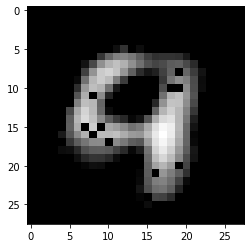

In [15]:
plt.imshow(ae_out, cmap="gray")